In [1]:
meteorites <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-06-11/meteorites.csv")

Parsed with column specification:
cols(
  name = col_character(),
  id = col_double(),
  name_type = col_character(),
  class = col_character(),
  mass = col_double(),
  fall = col_character(),
  year = col_double(),
  lat = col_double(),
  long = col_double(),
  geolocation = col_character()
)


In [2]:
options(warn = -1)
suppressPackageStartupMessages(library(tidyverse))

In [3]:
glimpse(meteorites)

Observations: 45,716
Variables: 10
$ name        <chr> "Aachen", "Aarhus", "Abee", "Acapulco", "Achiras", "Adh...
$ id          <dbl> 1, 2, 6, 10, 370, 379, 390, 392, 398, 417, 423, 424, 42...
$ name_type   <chr> "Valid", "Valid", "Valid", "Valid", "Valid", "Valid", "...
$ class       <chr> "L5", "H6", "EH4", "Acapulcoite", "L6", "EH4", "LL3-6",...
$ mass        <dbl> 21, 720, 107000, 1914, 780, 4239, 910, 30000, 1620, 144...
$ fall        <chr> "Fell", "Fell", "Fell", "Fell", "Fell", "Fell", "Fell",...
$ year        <dbl> 1880, 1951, 1952, 1976, 1902, 1919, 1949, 1814, 1930, 1...
$ lat         <dbl> 50.77500, 56.18333, 54.21667, 16.88333, -33.16667, 32.1...
$ long        <dbl> 6.08333, 10.23333, -113.00000, -99.90000, -64.95000, 71...
$ geolocation <chr> "(50.775, 6.08333)", "(56.18333, 10.23333)", "(54.21667...


In [4]:
map_int(meteorites, function(x) length(unique(x)))

name          id   name_type       class        mass        fall 
      45716       45716           2         455       12577           2 
       year         lat        long geolocation 
        266       12739       14641       17101

In [5]:
world_map <- ggplot2::borders("world")


Attaching package: 'maps'

The following object is masked from 'package:purrr':

    map



In [6]:
cleaned_data <- meteorites %>% filter(long <300)
dim(cleaned_data)

[1] 38400    10

In [7]:
library(ggrepel)

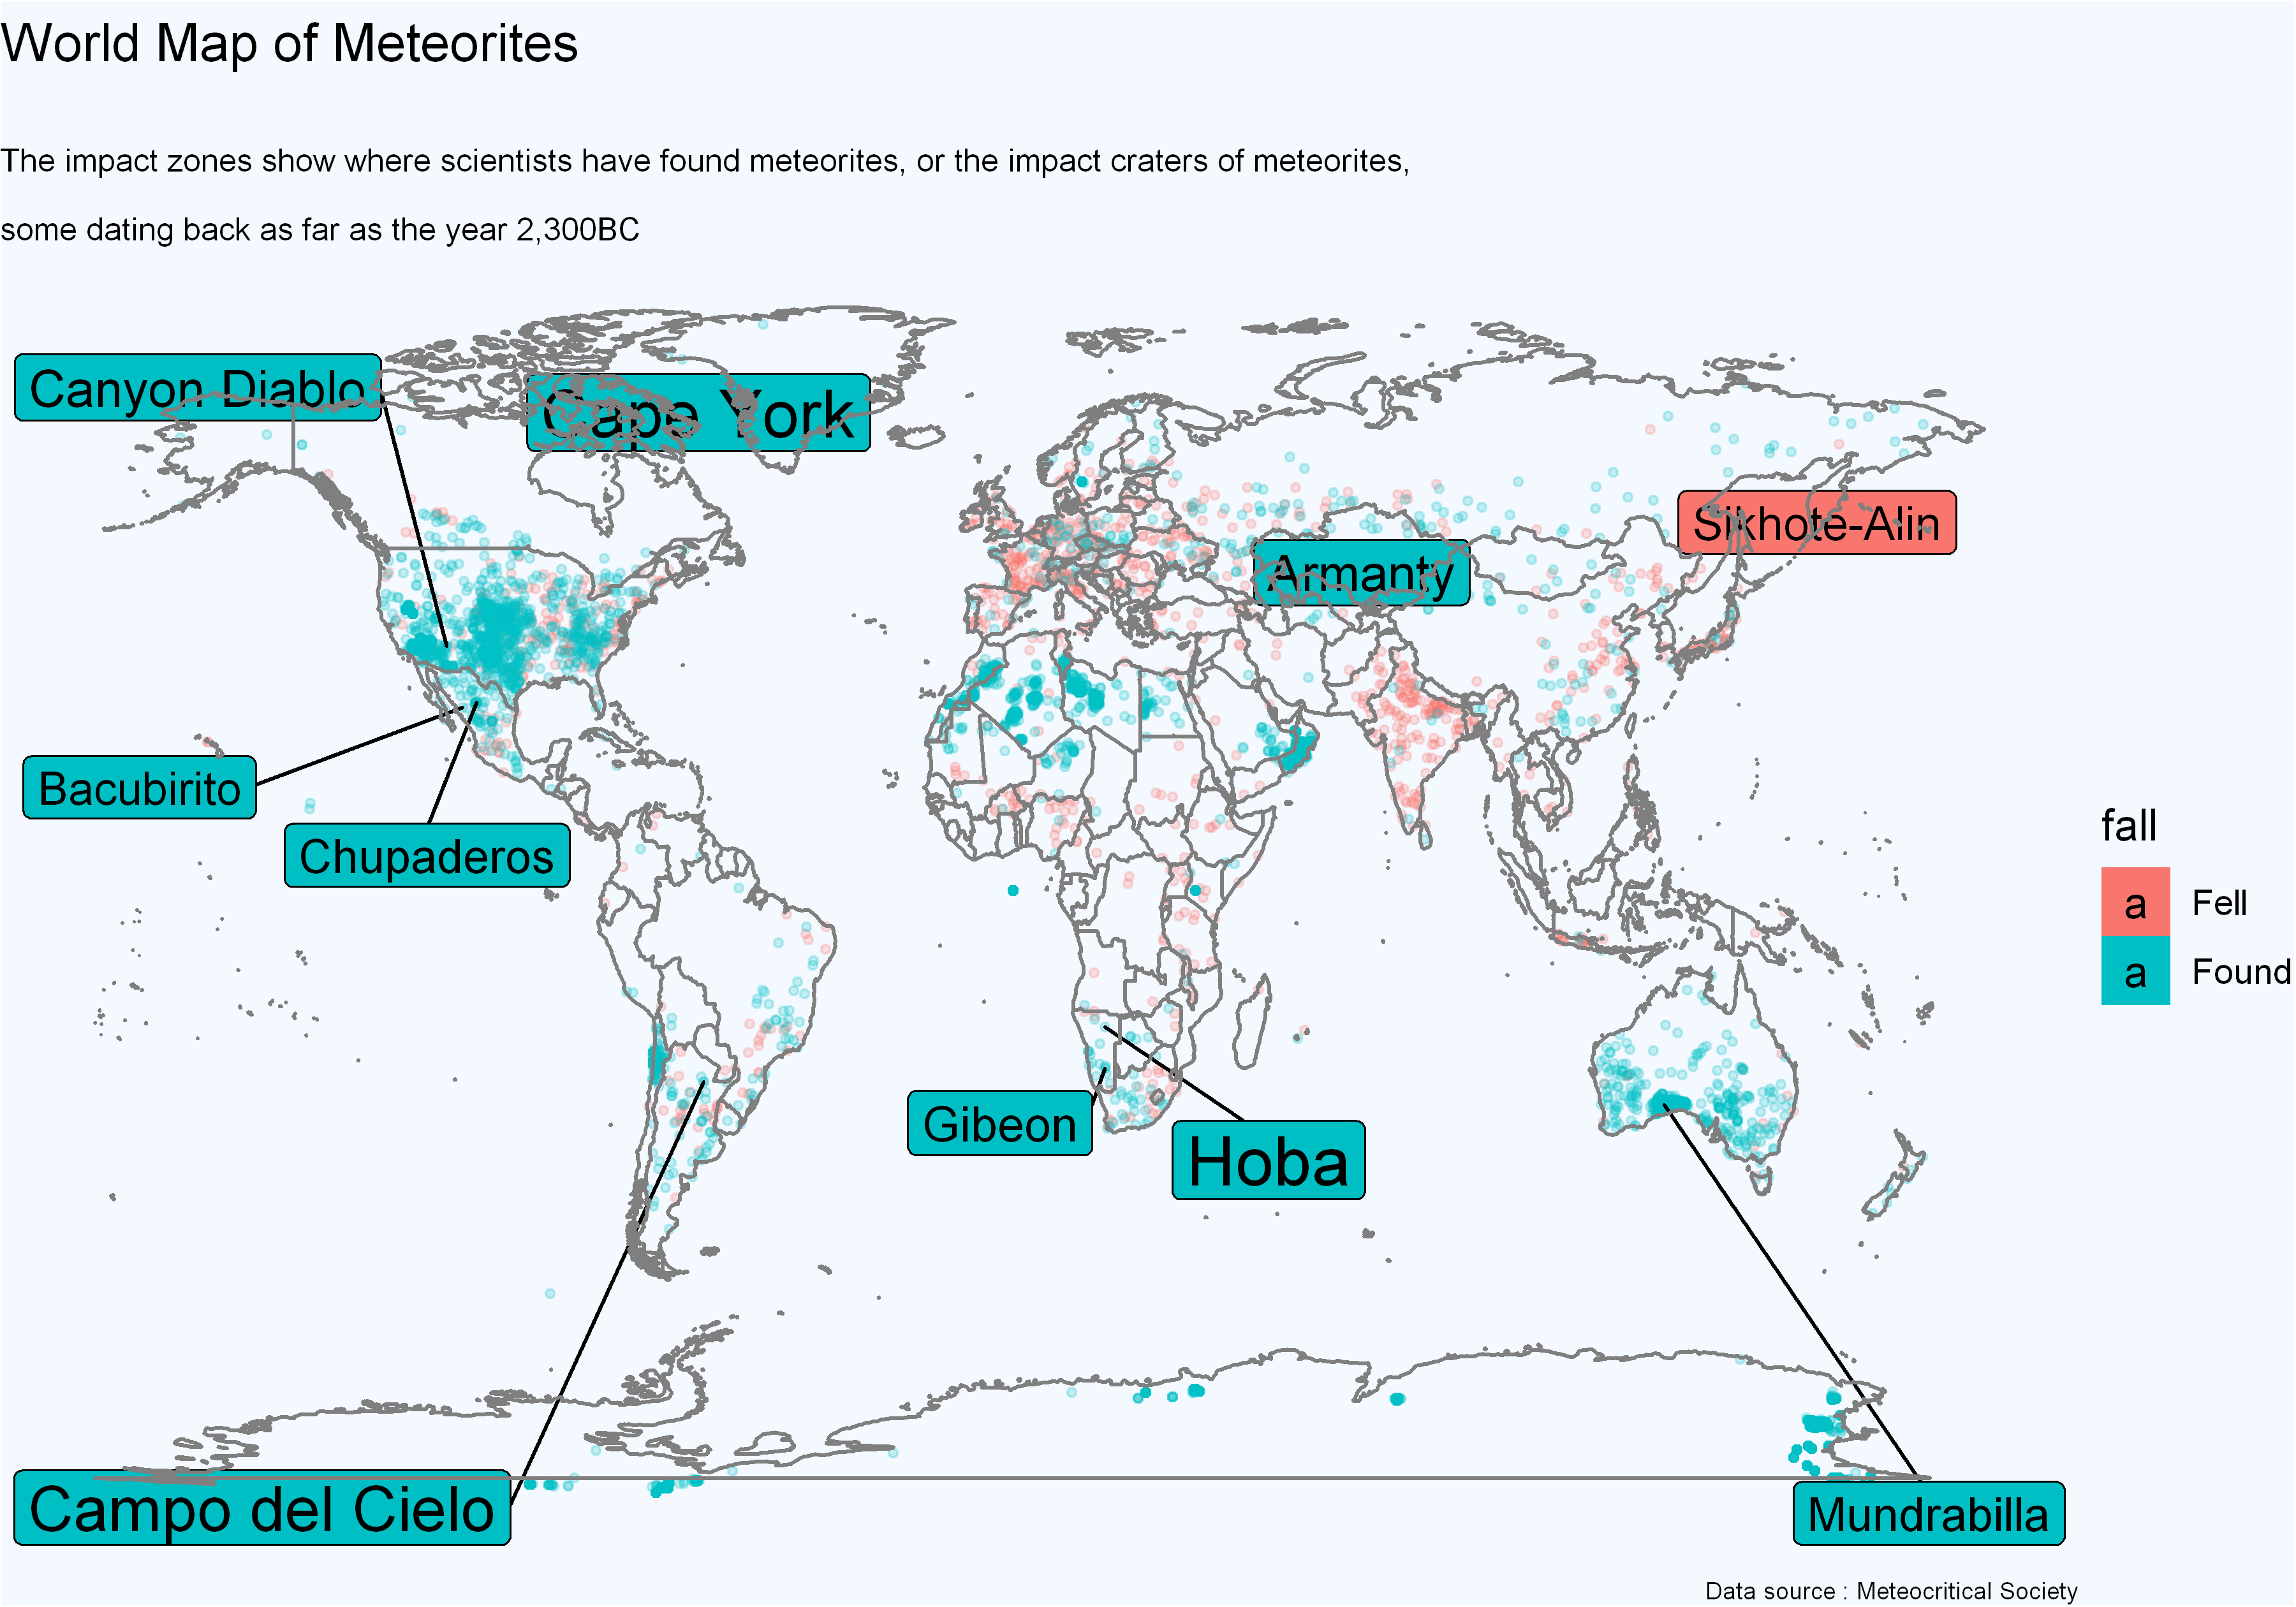

In [8]:
options(repr.plot.height = 5.6, repr.plot.res = 450, repr.plot.width = 8)
cleaned_data %>%
ggplot(aes(x = long, y = lat, col = fall)) +
geom_point(size = 0.8, alpha = 1/5) + theme_void() +
geom_label_repel(aes(label=ifelse(mass>2e07, name,''), 
                     fill = fall, size = mass), col = "black") + 
world_map +
labs(title = "World Map of Meteorites \n", subtitle = "The impact zones show where scientists have found meteorites, or the impact craters of meteorites, \n
some dating back as far as the year 2,300BC", caption = " Data source : Meteocritical Society") + 
guides(size = FALSE) +
theme(plot.background=element_rect(fill="#f4f8ff"),
      plot.subtitle = element_text(size = 8),
     plot.caption = element_text(size = 6))